In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
BRFSS2021 = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSV/BRFSS2021.csv')

In [ ]:
# Feature selection
DF = BRFSS2021[['BPHIGH6', 'TOLDHI3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'CHCSCNCR', 'CHCOCNCR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SEXVAR', '_AGE_G', 'MARITAL', 'EDUCA', 'VETERAN3', 'EMPLOY1', 'INCOME3', '_RACE', '_SMOKER3', 'USENOW3', 'ECIGNOW1', '_RFDRHV7', 'DIFFALON', 'DECIDE']]

In [ ]:
# Cleaning nulls
DF = DF.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'EMPLOY1': [9],
    'PRIMINSR': [77, 99],
    'INCOME3': [77, 99],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in DF.columns:
        DF = DF[~DF[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in DF.columns:
    if column not in refuse_values:
        refuse = [7, 9, 77, 99, 777, 999, 7777, 9999, 77777, 99999, 777777, 999999]
        DF = DF[~DF[column].isin(refuse)]

In [ ]:
# Dictionary to map old column names to new column names
column_mapping = {
    'BPHIGH6': 'Blood Pressure',
    'TOLDHI3': 'Cholesterol',
    'CVDINFR4': 'Myocardial Infarction',
    'CVDCRHD4': 'Heart Disease',
    'CVDSTRK3': 'Stroke',
    'ASTHMA3': 'Asthma',
    'CHCCOPD3': 'Bronchitis',
    'ADDEPEV3': 'Depressive Disorder',
    'CHCKDNY2': 'Renal Issue',
    'DIABETE4': 'Diabete',
    'CHCSCNCR': 'Skin Cancer',
    'CHCOCNCR': 'Cancer',
    'GENHLTH': 'General Health',
    'PHYSHLTH': 'Physical Health',
    'MENTHLTH': 'Mental Health',
    'PRIMINSR': 'Health Insurance',
    'PERSDOC3': 'Personal Health Care',
    'MEDCOST1': 'Medical Cost',
    'CHECKUP1': 'Routine Check',
    'EXERANY2': 'Exercise',
    'SEXVAR': 'Gendar',
    '_AGE_G': 'Age Group',
    'MARITAL': 'Marrital Status',
    'EDUCA': 'Eduction Status',
    'VETERAN3': 'Military Record',
    'EMPLOY1': 'Employment Status',
    'INCOME3': 'Income',
    '_RACE': 'Ethnicity',
    '_SMOKER3': 'Smoking Status',
    'USENOW3': 'Non-Smoking Tobacco',
    'ECIGNOW1': 'E-cigarette',
    '_RFDRHV7': 'Alcohol Consumption',
    'DIFFALON': 'Errands Alone',
    'DECIDE': 'Cognition Dysfunction'
}

# Rename the columns using the mapping
DF = DF.rename(columns=column_mapping)

In [ ]:
# Separating data
Healthy = DF[DF['Cognition Dysfunction']==2]
Affected = DF[DF['Cognition Dysfunction']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.30, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['Cognition Dysfunction'], axis=1) # Input features
y_train = train['Cognition Dysfunction'] # Target label

x_test = test.drop(['Cognition Dysfunction'], axis=1) # Input features
y_test = test['Cognition Dysfunction'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 15545


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 6663


## NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss

# Initialize NearMiss
nm = NearMiss(version=1)

# Fit and transform the training data
x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
x_train_resampled = pd.DataFrame(x_train_resampled)
y_train_resampled = pd.DataFrame(y_train_resampled)

# Save NearMiss data
x_train_resampled.to_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/NearMiss/x_train_resampled(NearMiss).csv', index=False)
y_train_resampled.to_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/NearMiss/y_train_resampled(NearMiss).csv', index=False)
"""

In [ ]:
# Load oversampled data
x_train_resampled = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/NearMiss/x_train_resampled(NearMiss).csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/NearMiss/y_train_resampled(NearMiss).csv')

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train_resampled == 0)
class_1_count = np.sum(y_train_resampled == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 0    15545
dtype: int64
Class 1 count: 0    15545
dtype: int64


In [ ]:
import copy

x_train = copy.deepcopy(x_train_resampled) # Copying oversampled input data
y_train = copy.deepcopy(y_train_resampled) # Copying oversampled target data

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 0    15545
dtype: int64
Class 1 count: 0    15545
dtype: int64


In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

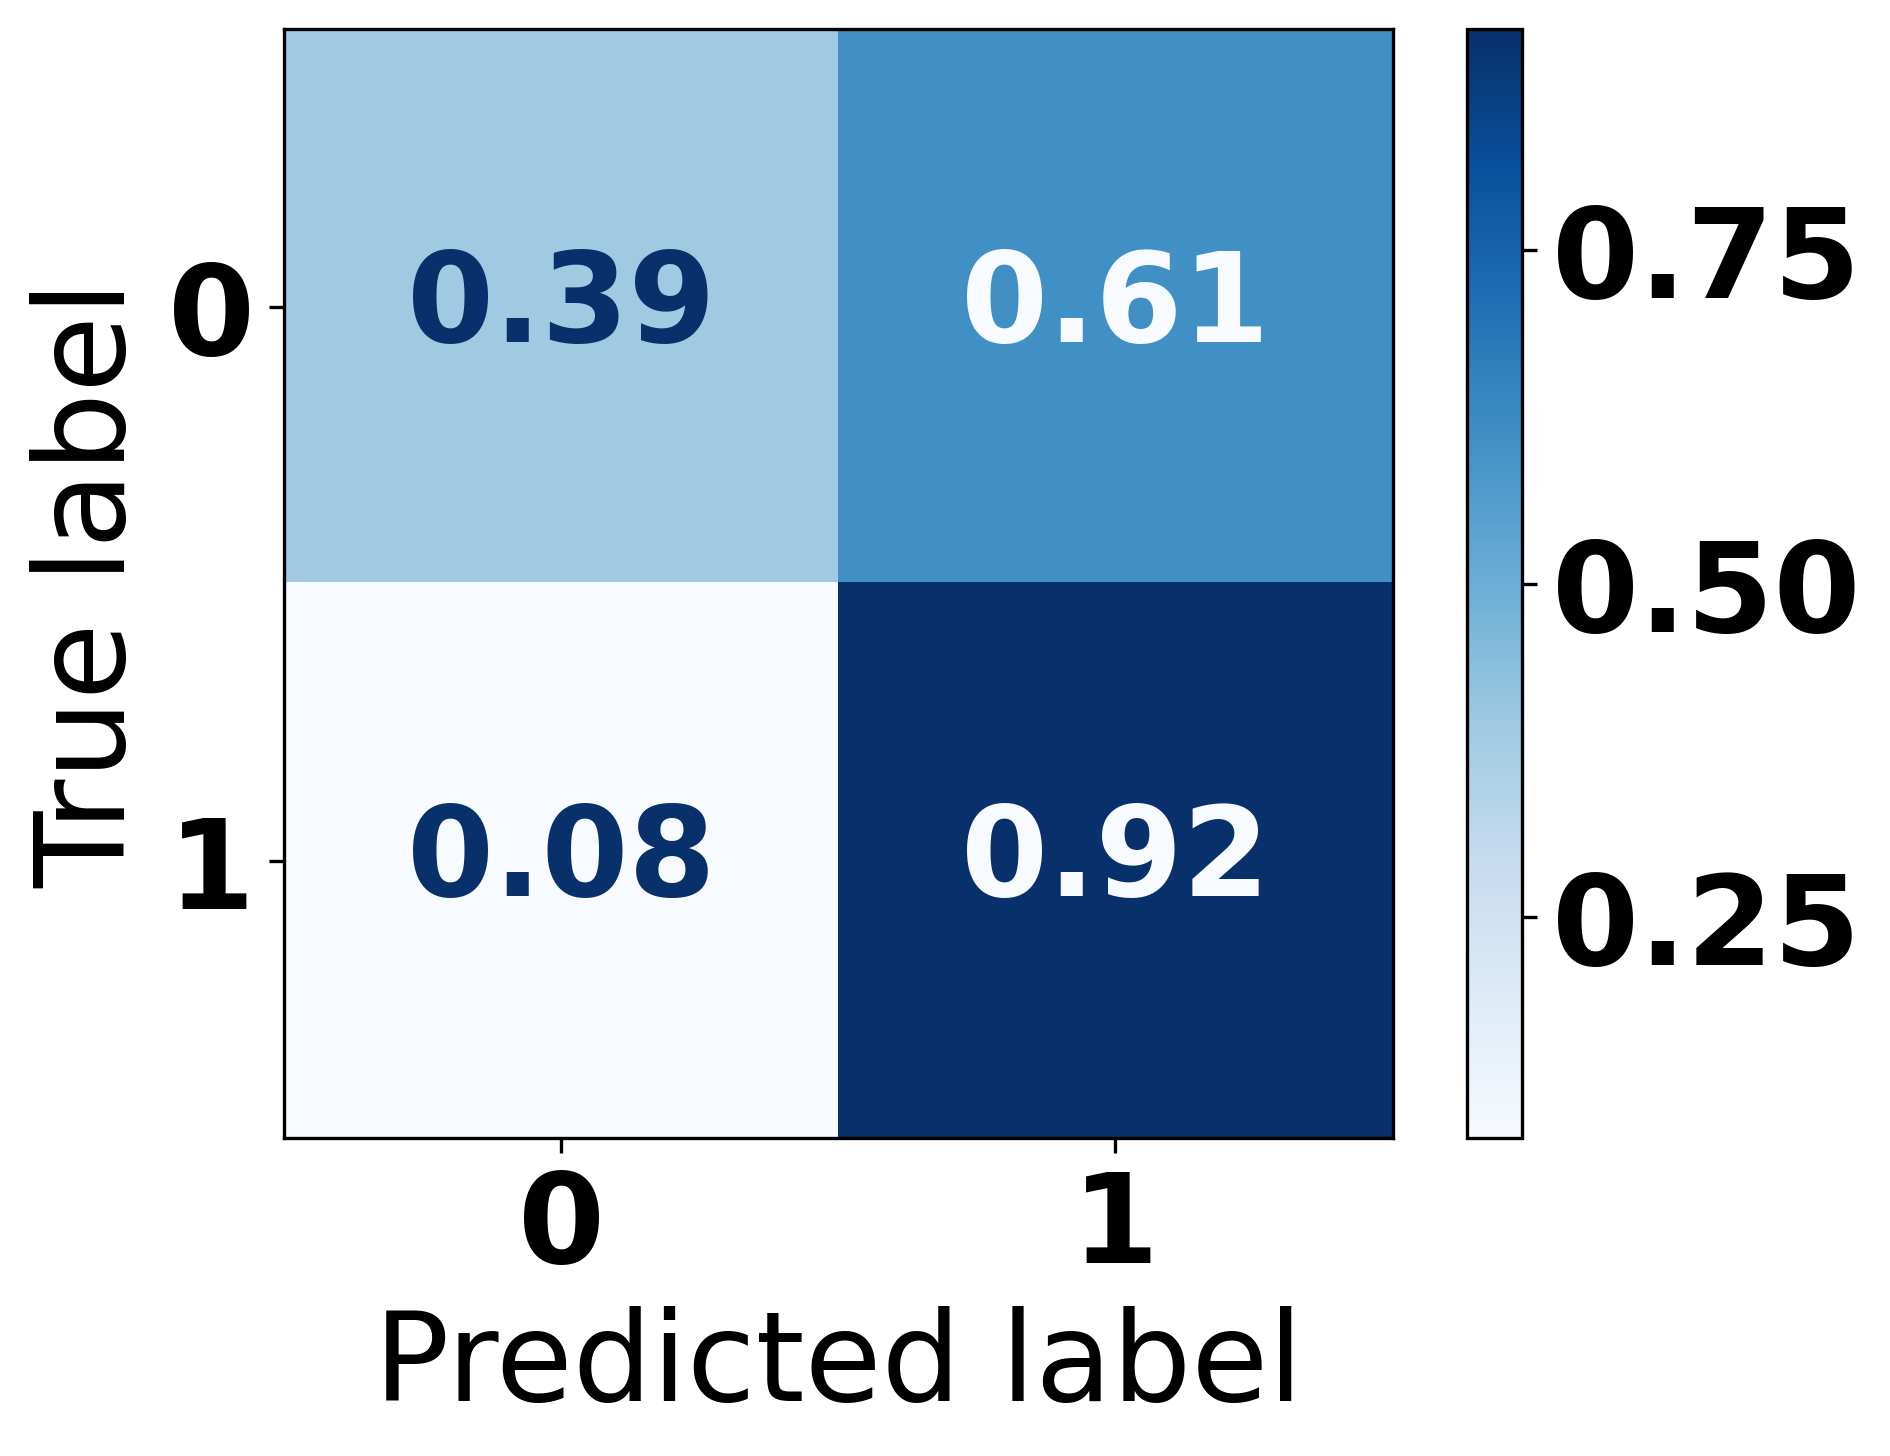

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.39      0.56    110005
     Class 1       0.08      0.92      0.15      6663

    accuracy                           0.42    116668
   macro avg       0.54      0.65      0.36    116668
weighted avg       0.94      0.42      0.54    116668

Train Accuracy: 0.9982309424252171
Test Accuracy: 0.4201151986834436


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


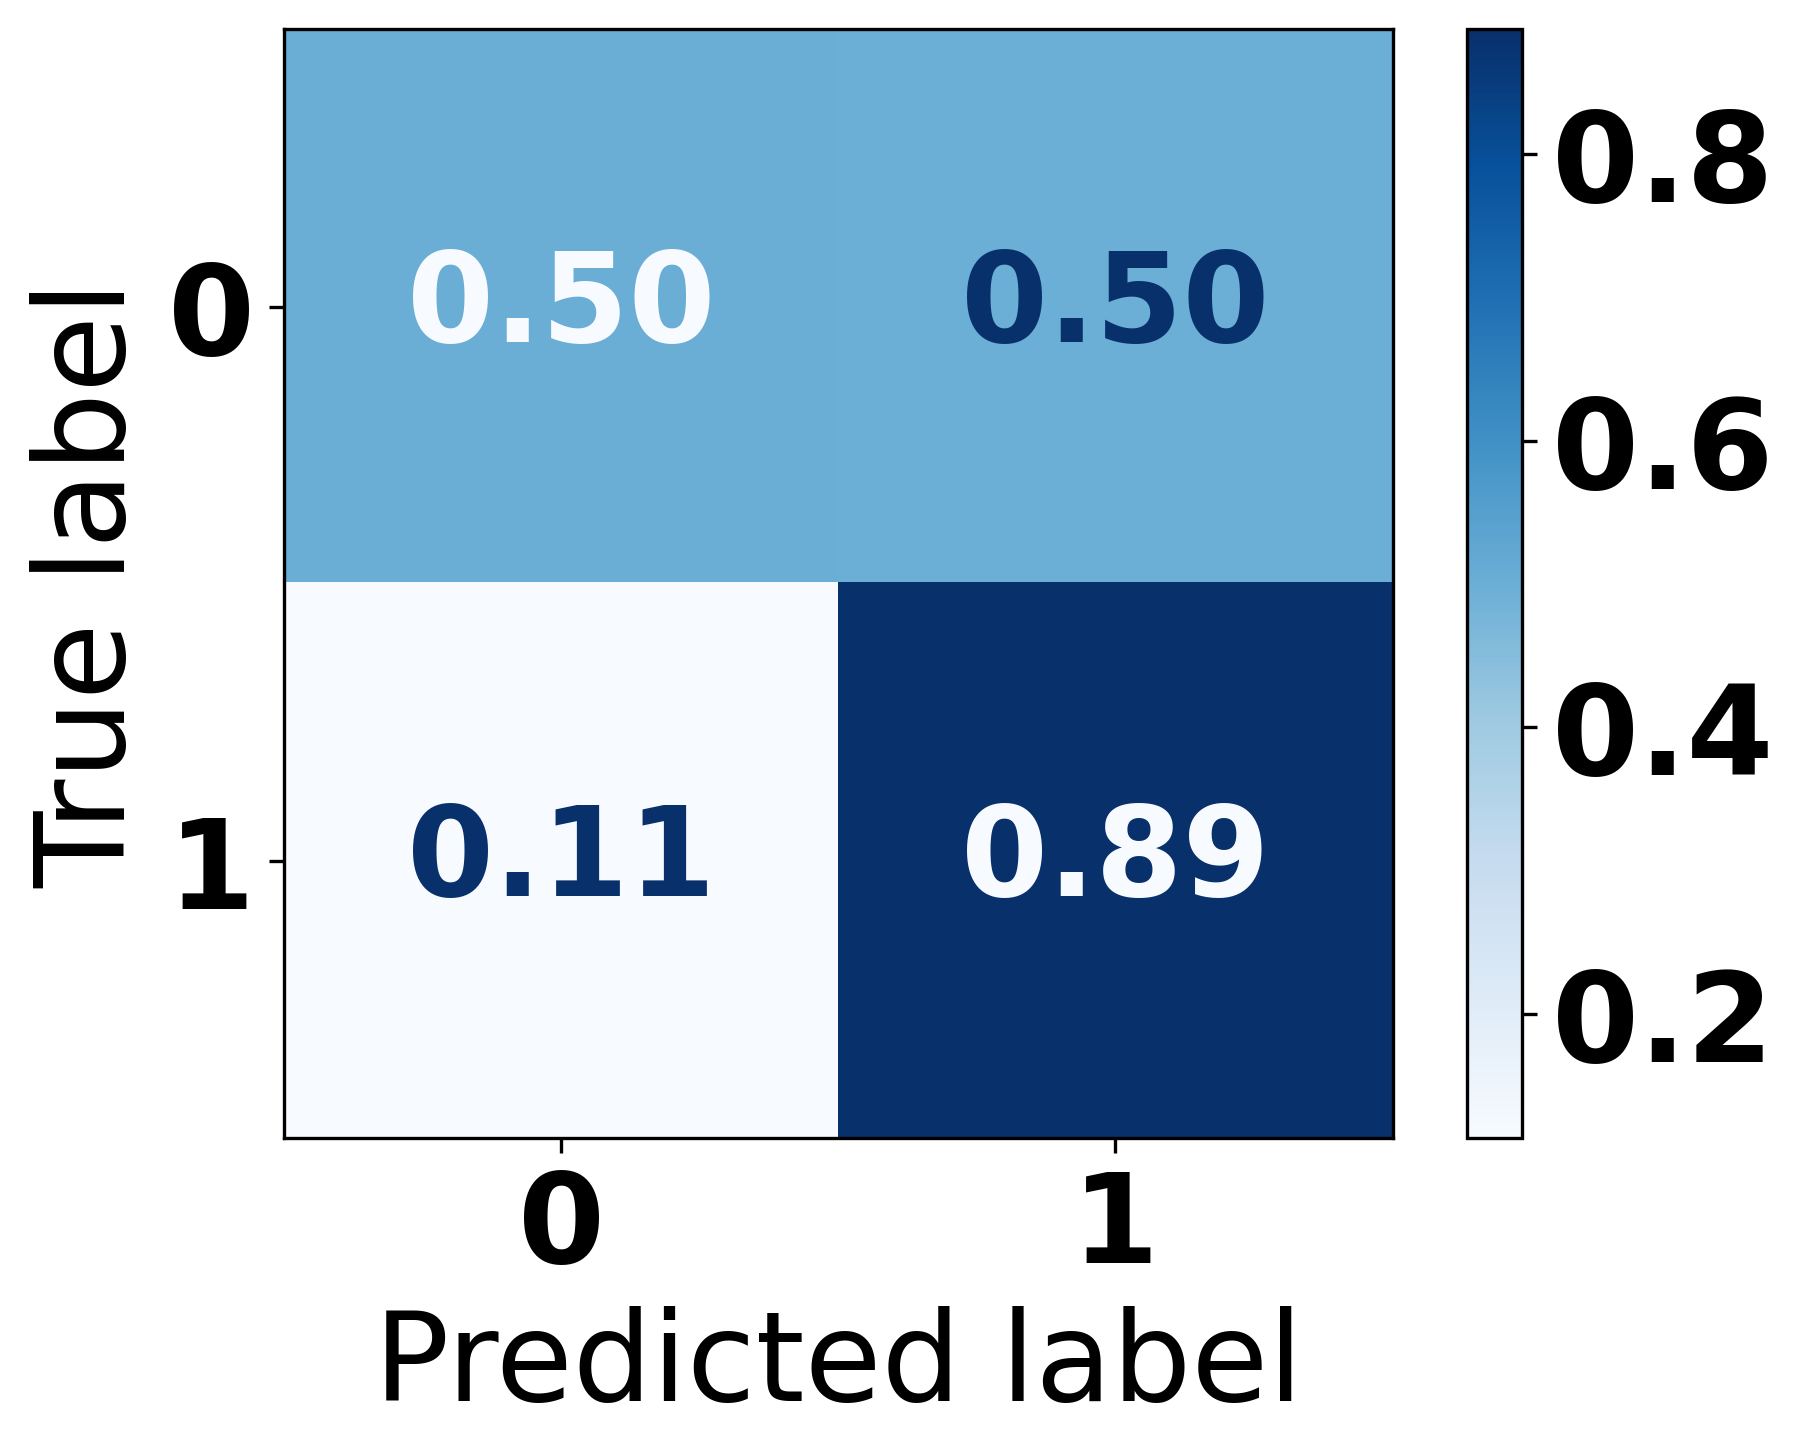

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.50      0.66    110005
     Class 1       0.10      0.89      0.18      6663

    accuracy                           0.52    116668
   macro avg       0.54      0.69      0.42    116668
weighted avg       0.94      0.52      0.64    116668

Train Accuracy: 0.9250884528787392
Test Accuracy: 0.5230397366887236


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=10, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

<ipython-input-23-2417d1570aca>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = RF.fit(x_train, y_train).predict(x_test)


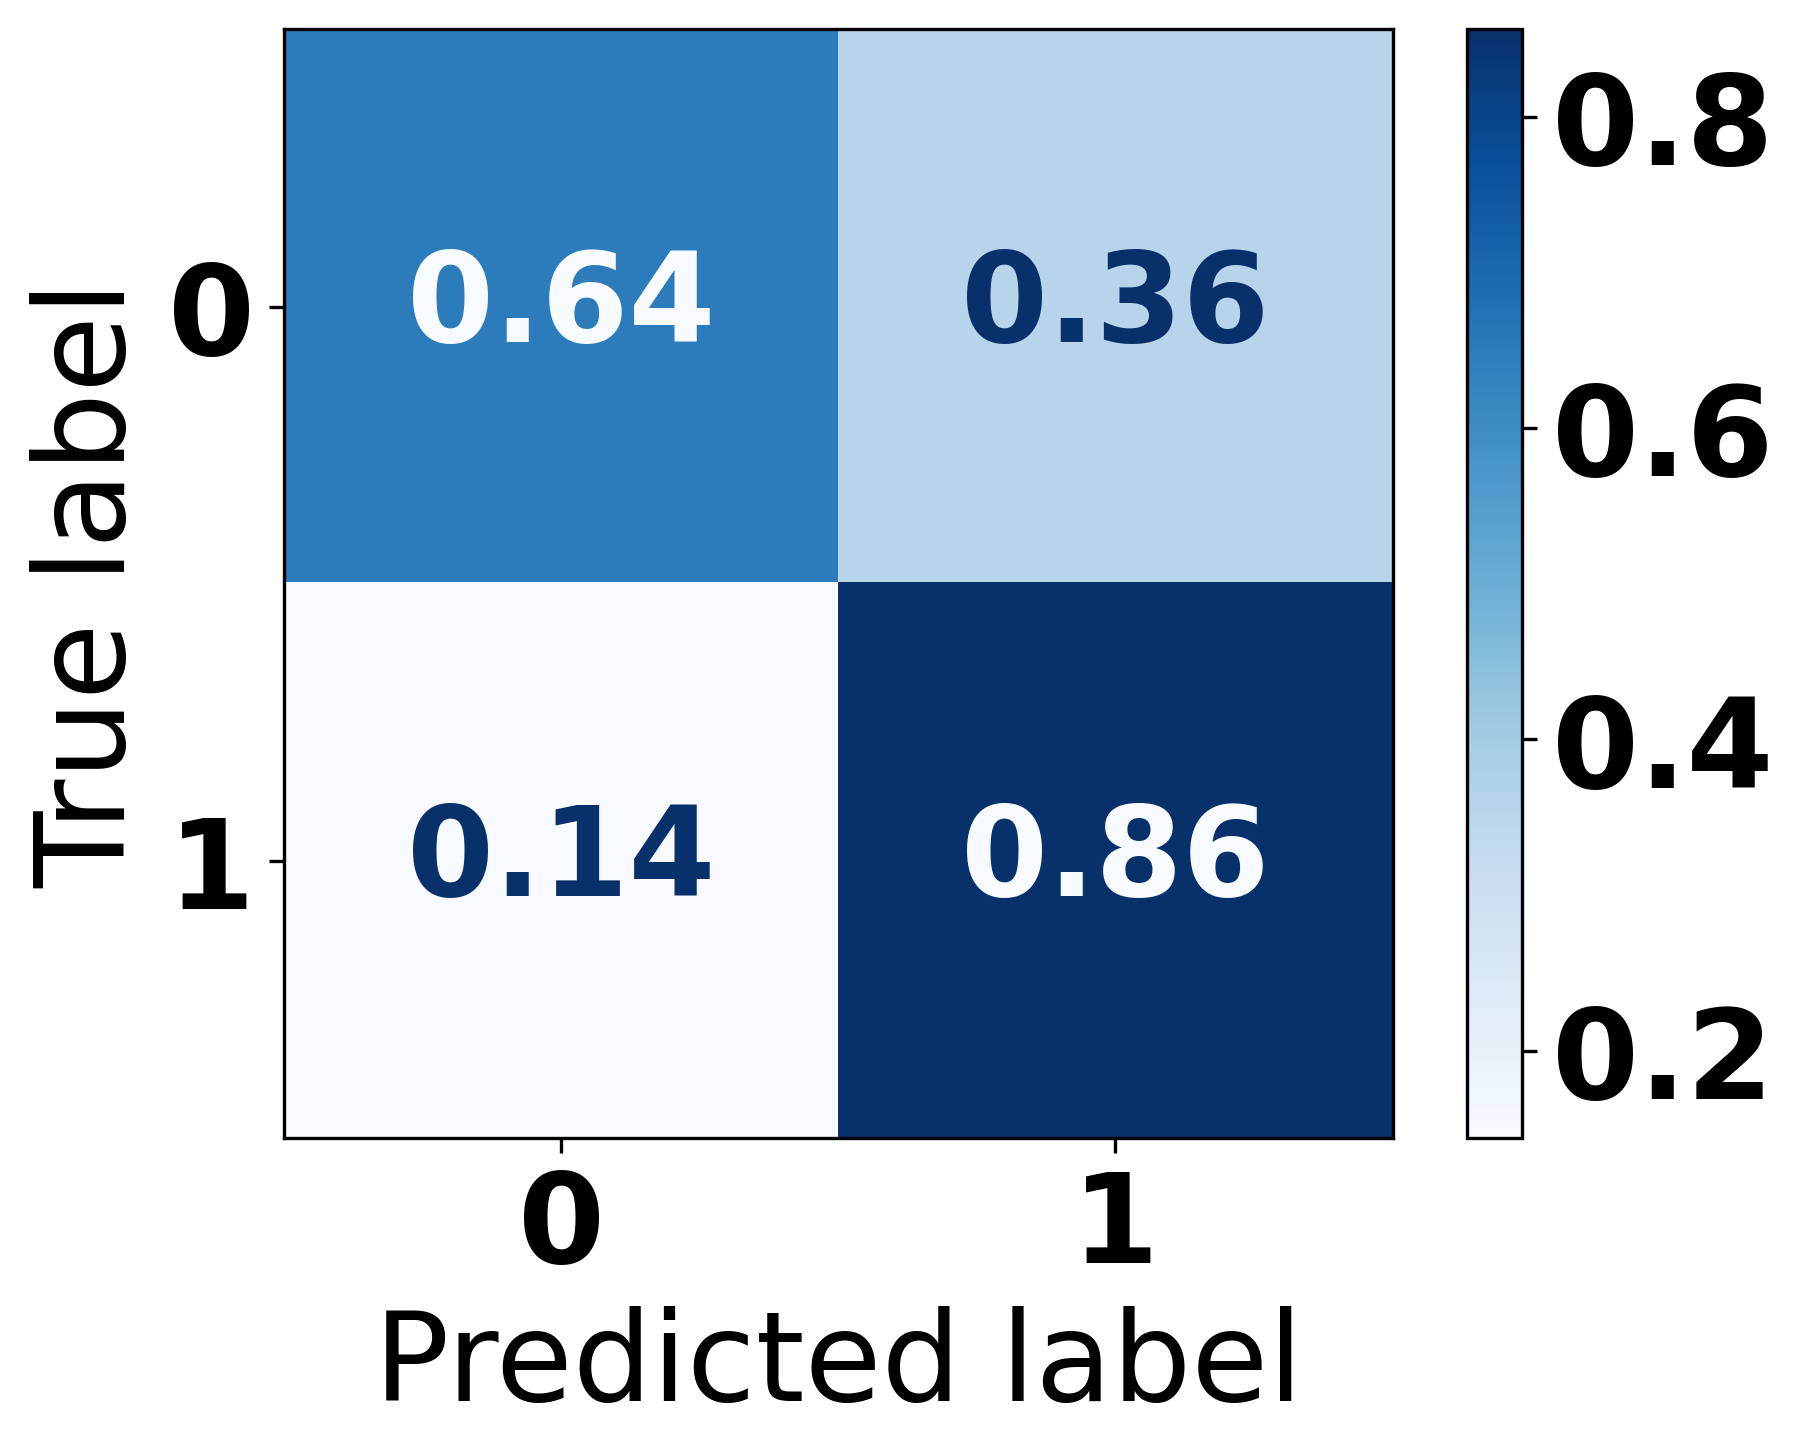

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.64      0.78    110005
           1       0.13      0.86      0.22      6663

    accuracy                           0.66    116668
   macro avg       0.56      0.75      0.50    116668
weighted avg       0.94      0.66      0.75    116668

Train Accuracy: 0.9064007719523963
Test Accuracy: 0.6567524942572085


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/MyDrive/Cognition Dysfunction/Dataset/NearMiss/model/RF(nearmiss).pkl')
"""

['/content/drive/MyDrive/Cognition Dysfunction/Dataset/NearMiss/model/rusboost(nearmiss).pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/MyDrive/Cognition Dysfunction/Dataset/NearMiss/model/RF(nearmiss).pkl')

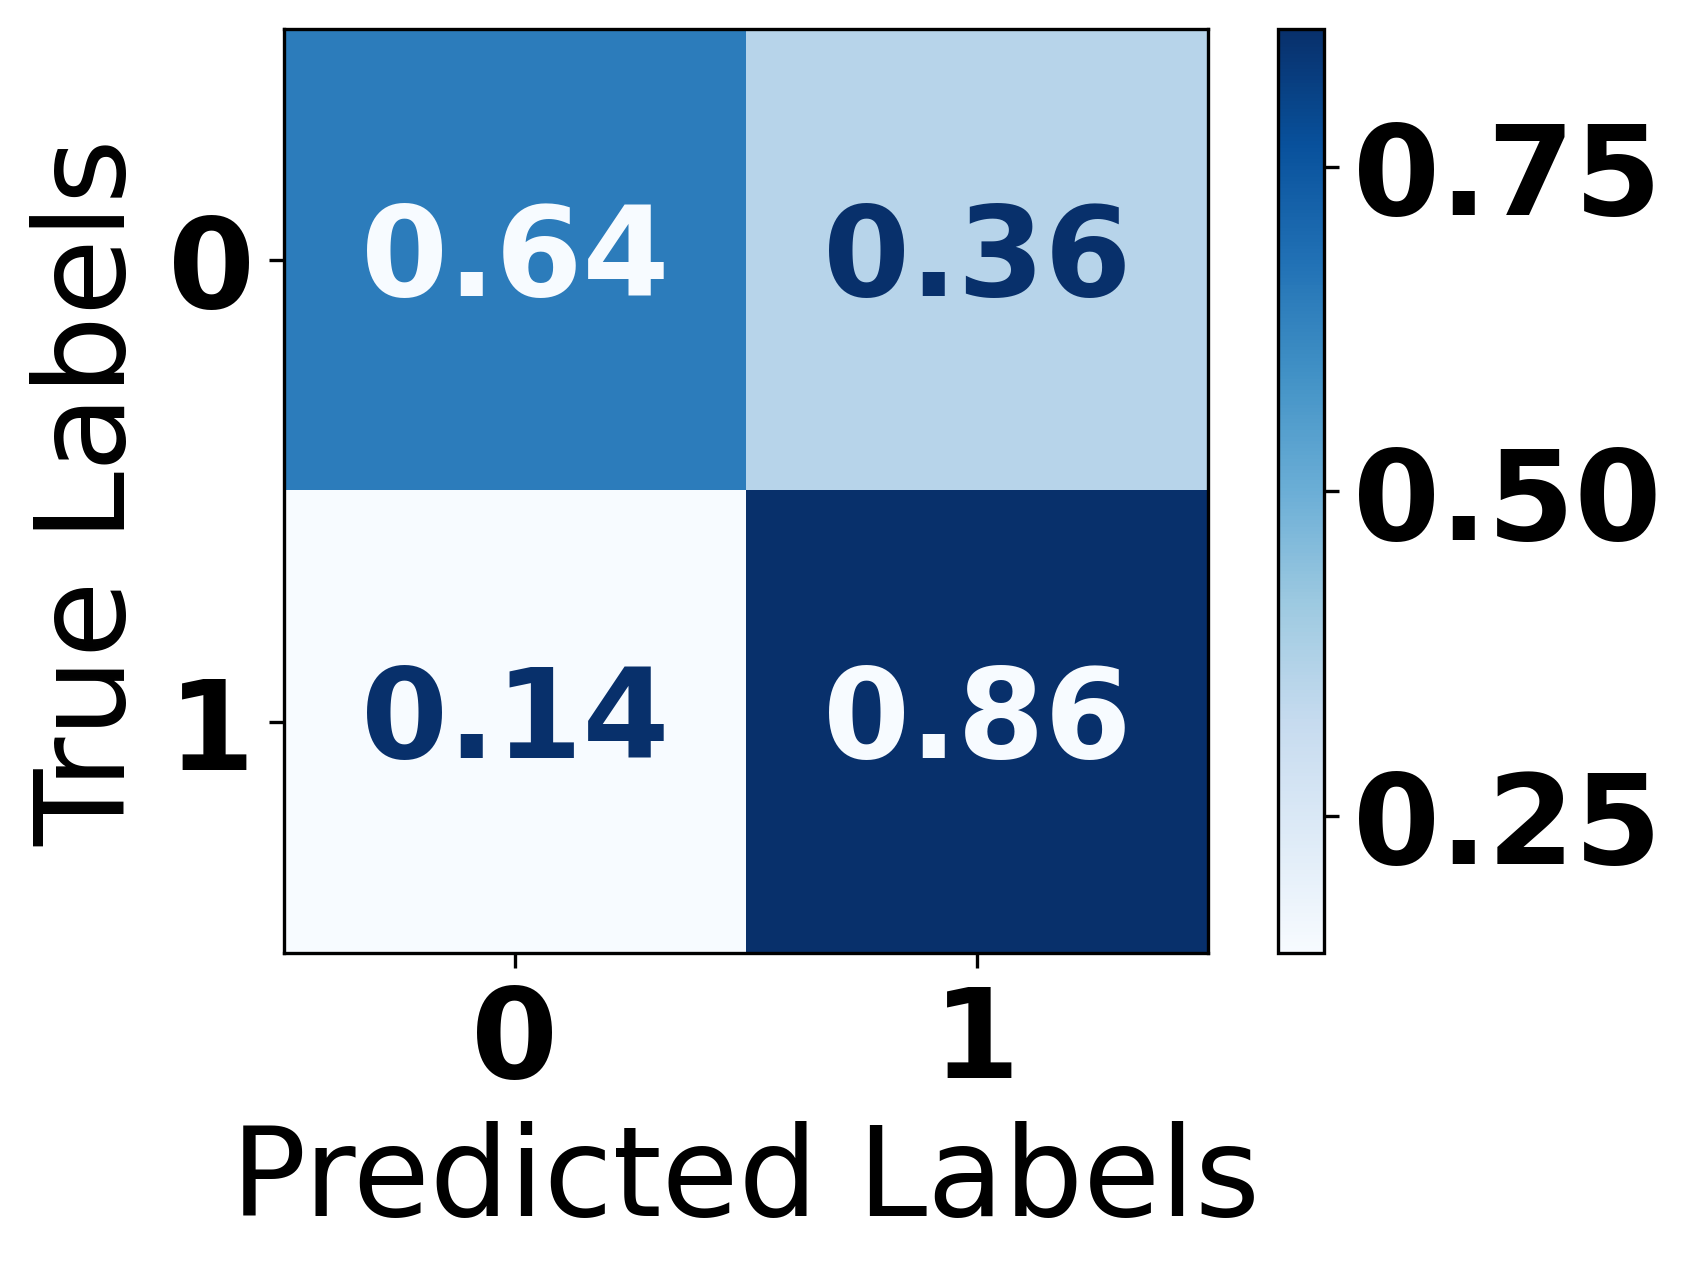

In [ ]:
# Predicting the output on the test dataset
y_pred = RF.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


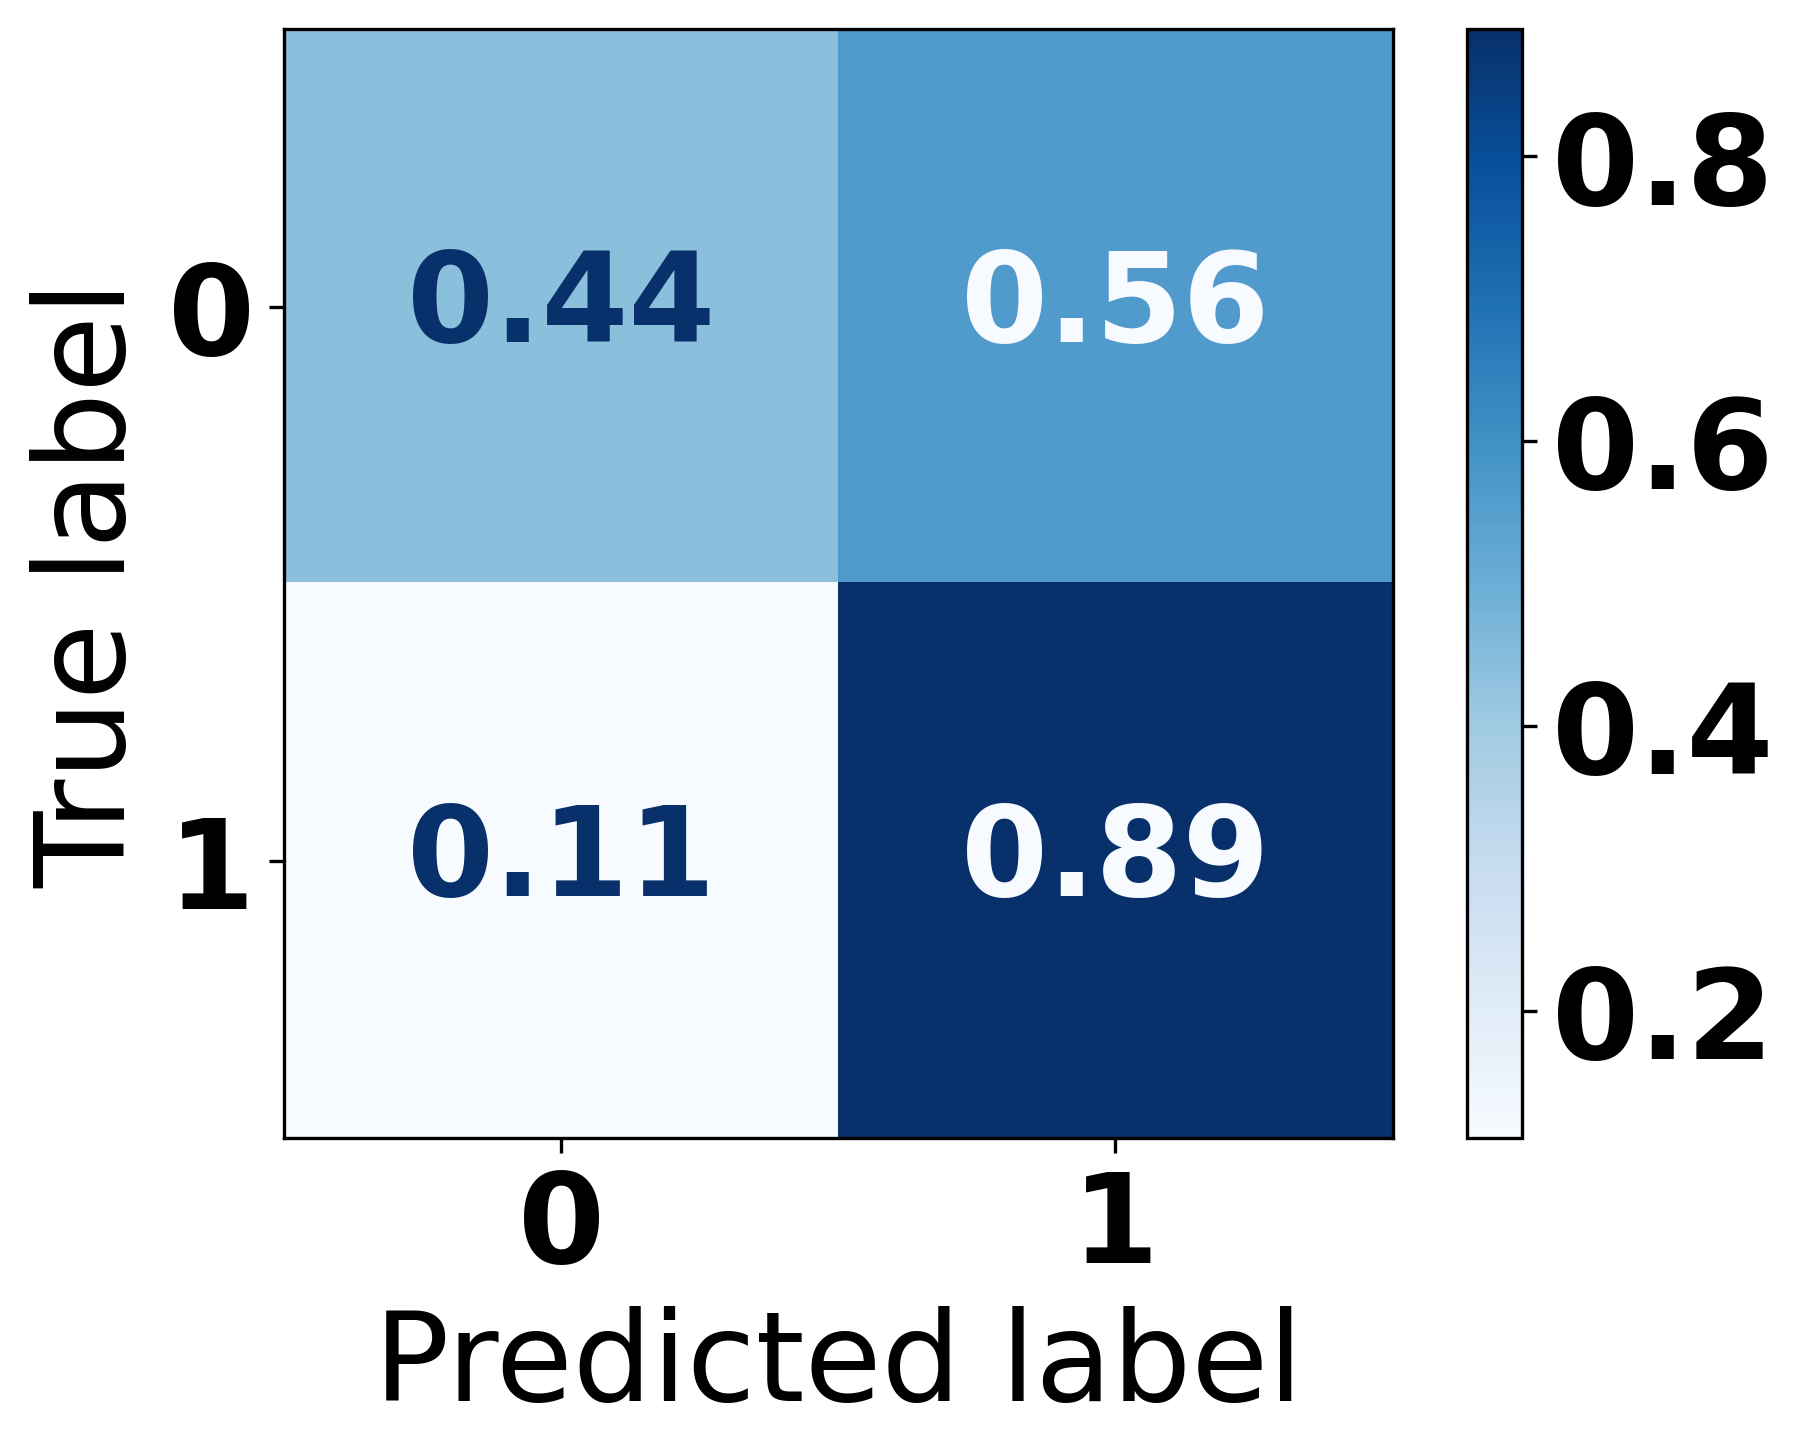

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.44      0.60    110005
           1       0.09      0.89      0.16      6663

    accuracy                           0.46    116668
   macro avg       0.54      0.66      0.38    116668
weighted avg       0.93      0.46      0.58    116668

Train Accuracy: 0.9028948214860084
Test Accuracy: 0.4620632907052491


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


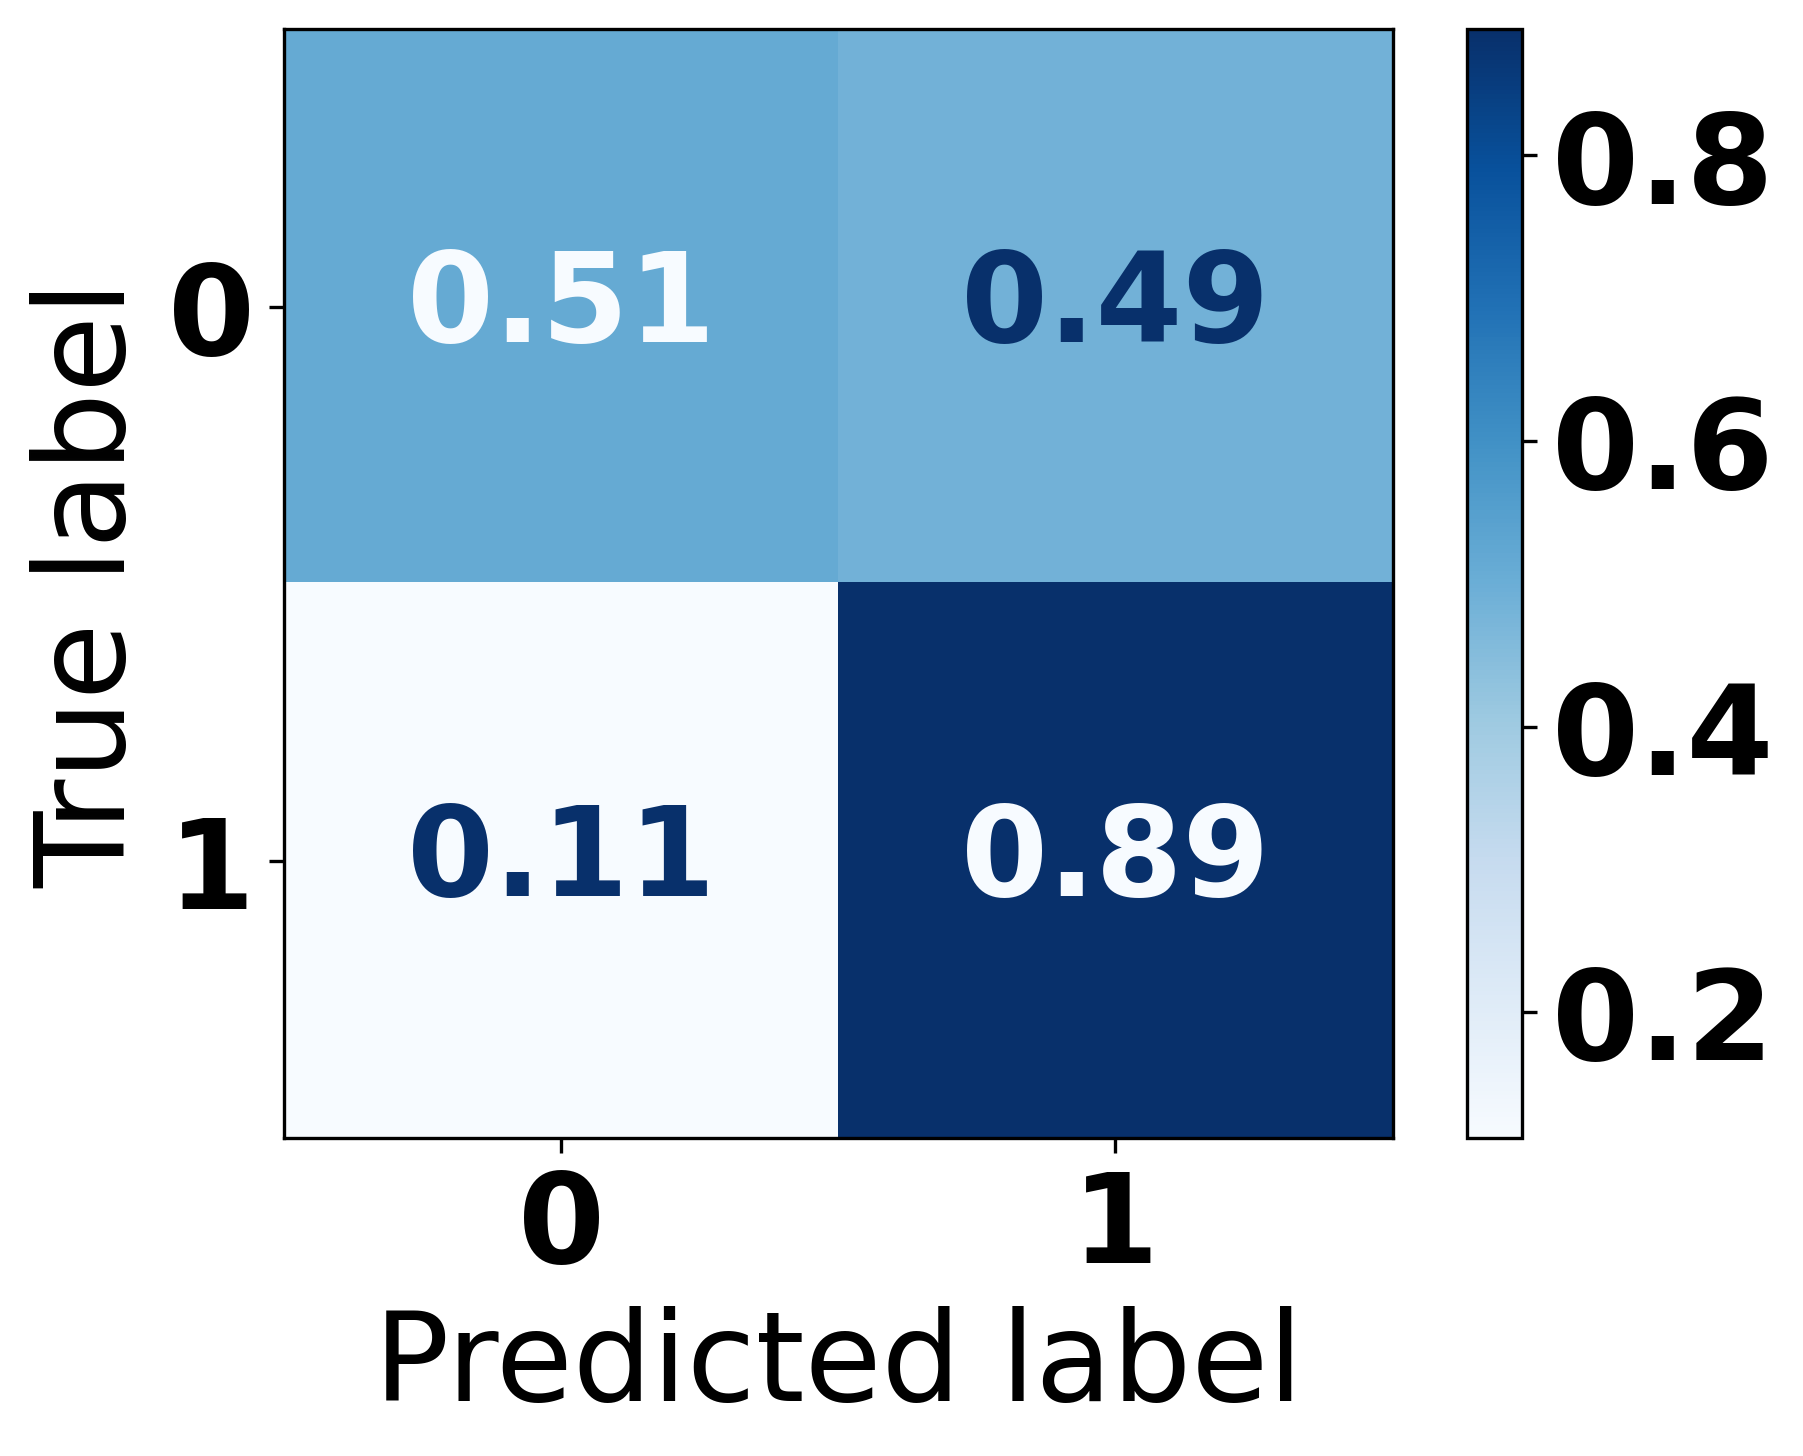

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.51      0.68    110005
           1       0.10      0.89      0.18      6663

    accuracy                           0.54    116668
   macro avg       0.54      0.70      0.43    116668
weighted avg       0.94      0.54      0.65    116668

Train Accuracy: 0.9276937922161467
Test Accuracy: 0.5356224500291425


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=17, learning_rate=0.4, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

### Deep Learning Approach

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.42475342 0.57524658]
 [0.07263995 0.92736005]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.42      0.59    110005
     Class 1       0.09      0.93      0.16      6663

    accuracy                           0.45    116668
   macro avg       0.54      0.68      0.38    116668
weighted avg       0.94      0.45      0.57    116668



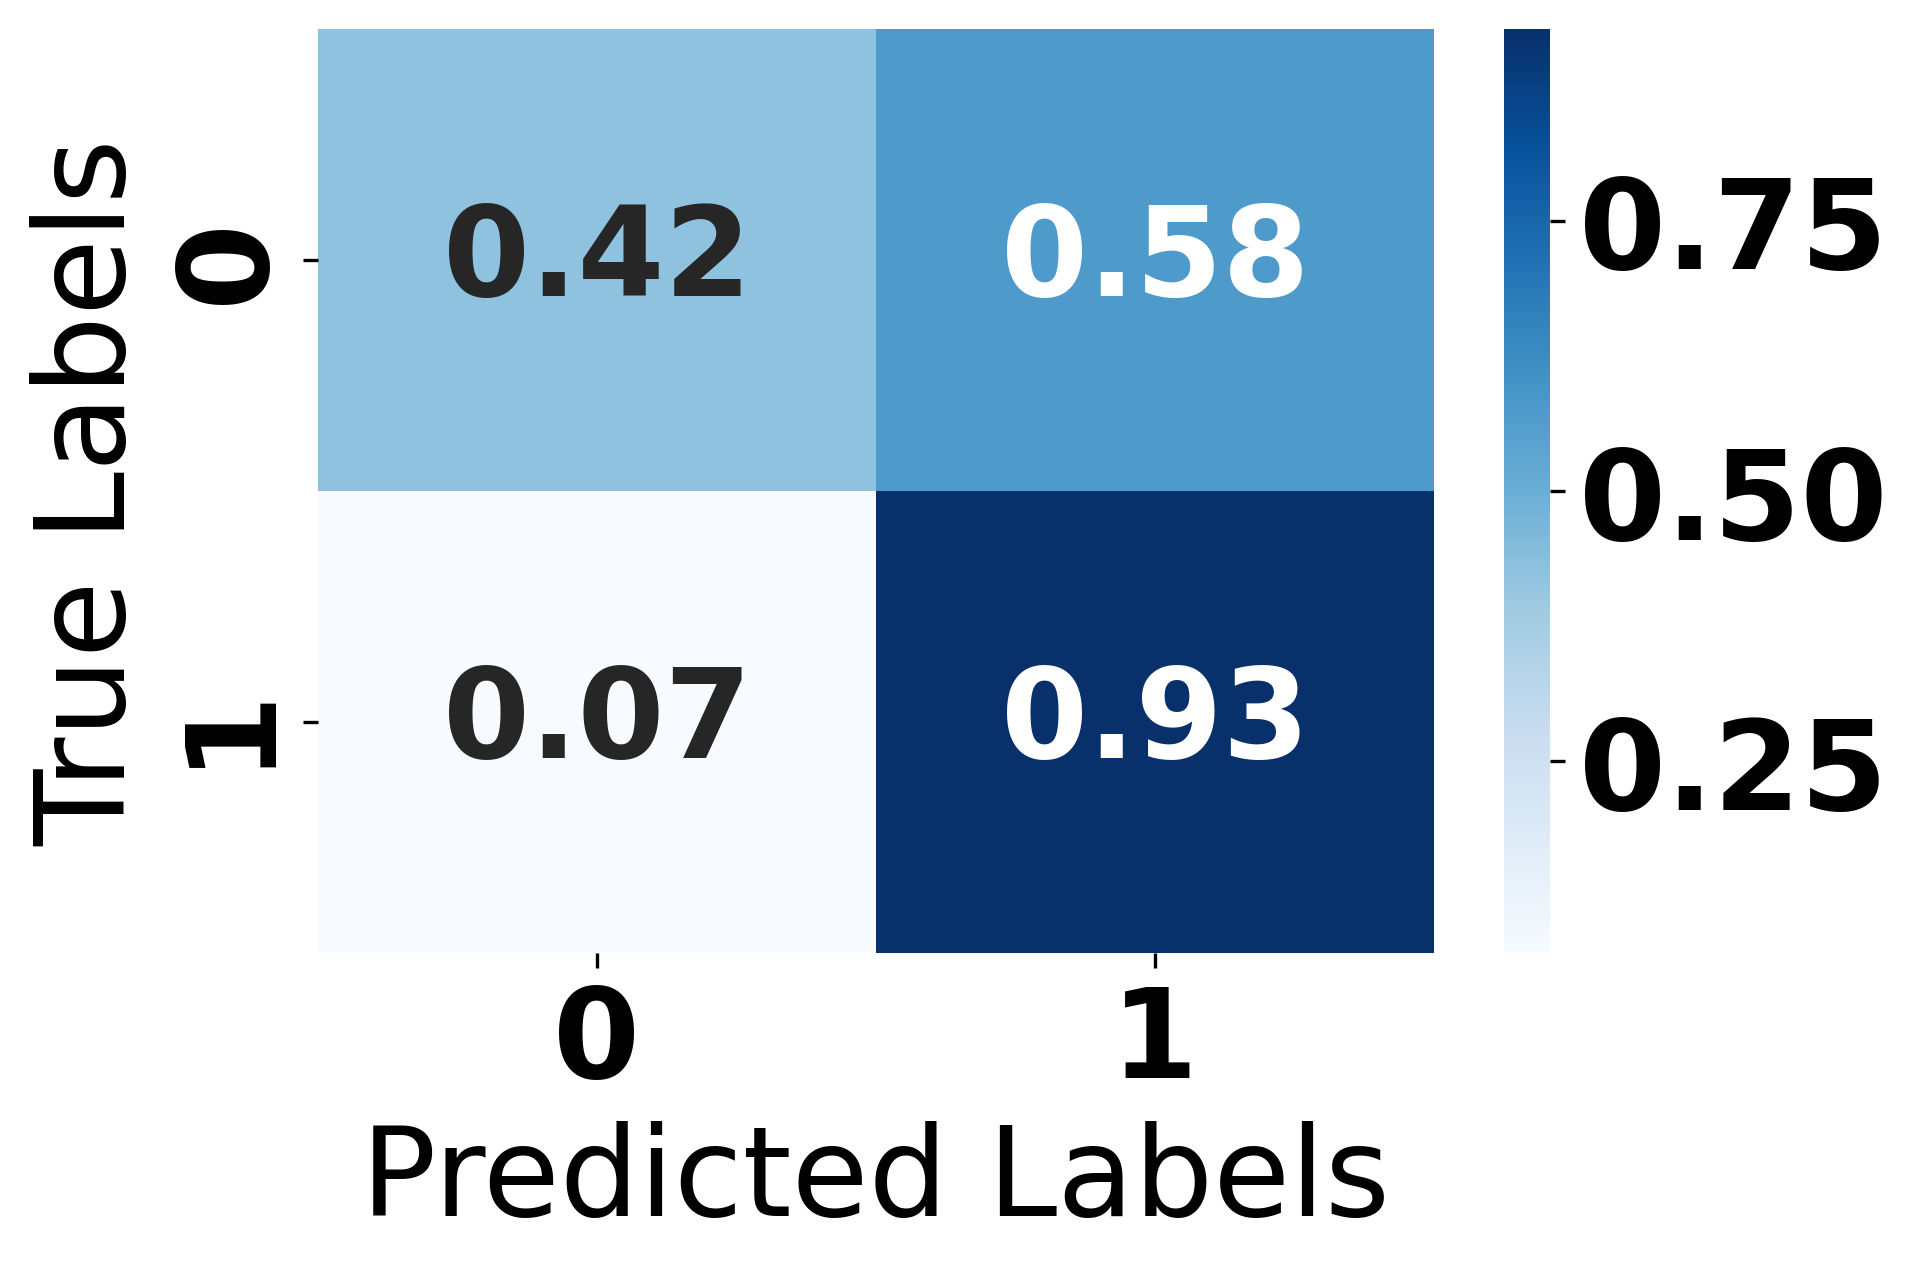

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
243/243 [==============================] - 10s 17ms/step - loss: 0.2794 - accuracy: 0.8960 - val_loss: 2.0962 - val_accuracy: 0.6086
Epoch 2/10
243/243 [==============================] - 4s 16ms/step - loss: 0.1889 - accuracy: 0.9303 - val_loss: 3.3773 - val_accuracy: 0.4986
Epoch 3/10
243/243 [==============================] - 3s 13ms/step - loss: 0.1676 - accuracy: 0.9377 - val_loss: 3.8539 - val_accuracy: 0.3988
Epoch 4/10
243/243 [==============================] - 4s 16ms/step - loss: 0.1545 - accuracy: 0.9447 - val_loss: 3.9321 - val_accuracy: 0.4022
Epoch 5/10
243/243 [==============================] - 6s 26ms/step - loss: 0.1415 - accuracy: 0.9491 - val_loss: 3.8180 - val_accuracy: 0.4719
Epoch 6/10
243/243 [==============================] - 3s 13ms/step - loss: 0.1411 - accuracy: 0.9486 - val_loss: 4.0381 - val_accuracy: 0.3868
Epoch 7/10
243/243 [==============================] - 3s 13ms/step - loss: 0.1360 - accuracy: 0.9514 - val_loss: 3.5019 - val_accuracy: 0.487

3646/3646 [==============================] - 8s 2ms/step
Normalized Confusion Matrix:
[[0.48500523 0.51499477]
 [0.09785382 0.90214618]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.49      0.65    110005
     Class 1       0.10      0.90      0.17      6663

    accuracy                           0.51    116668
   macro avg       0.54      0.69      0.41    116668
weighted avg       0.94      0.51      0.62    116668



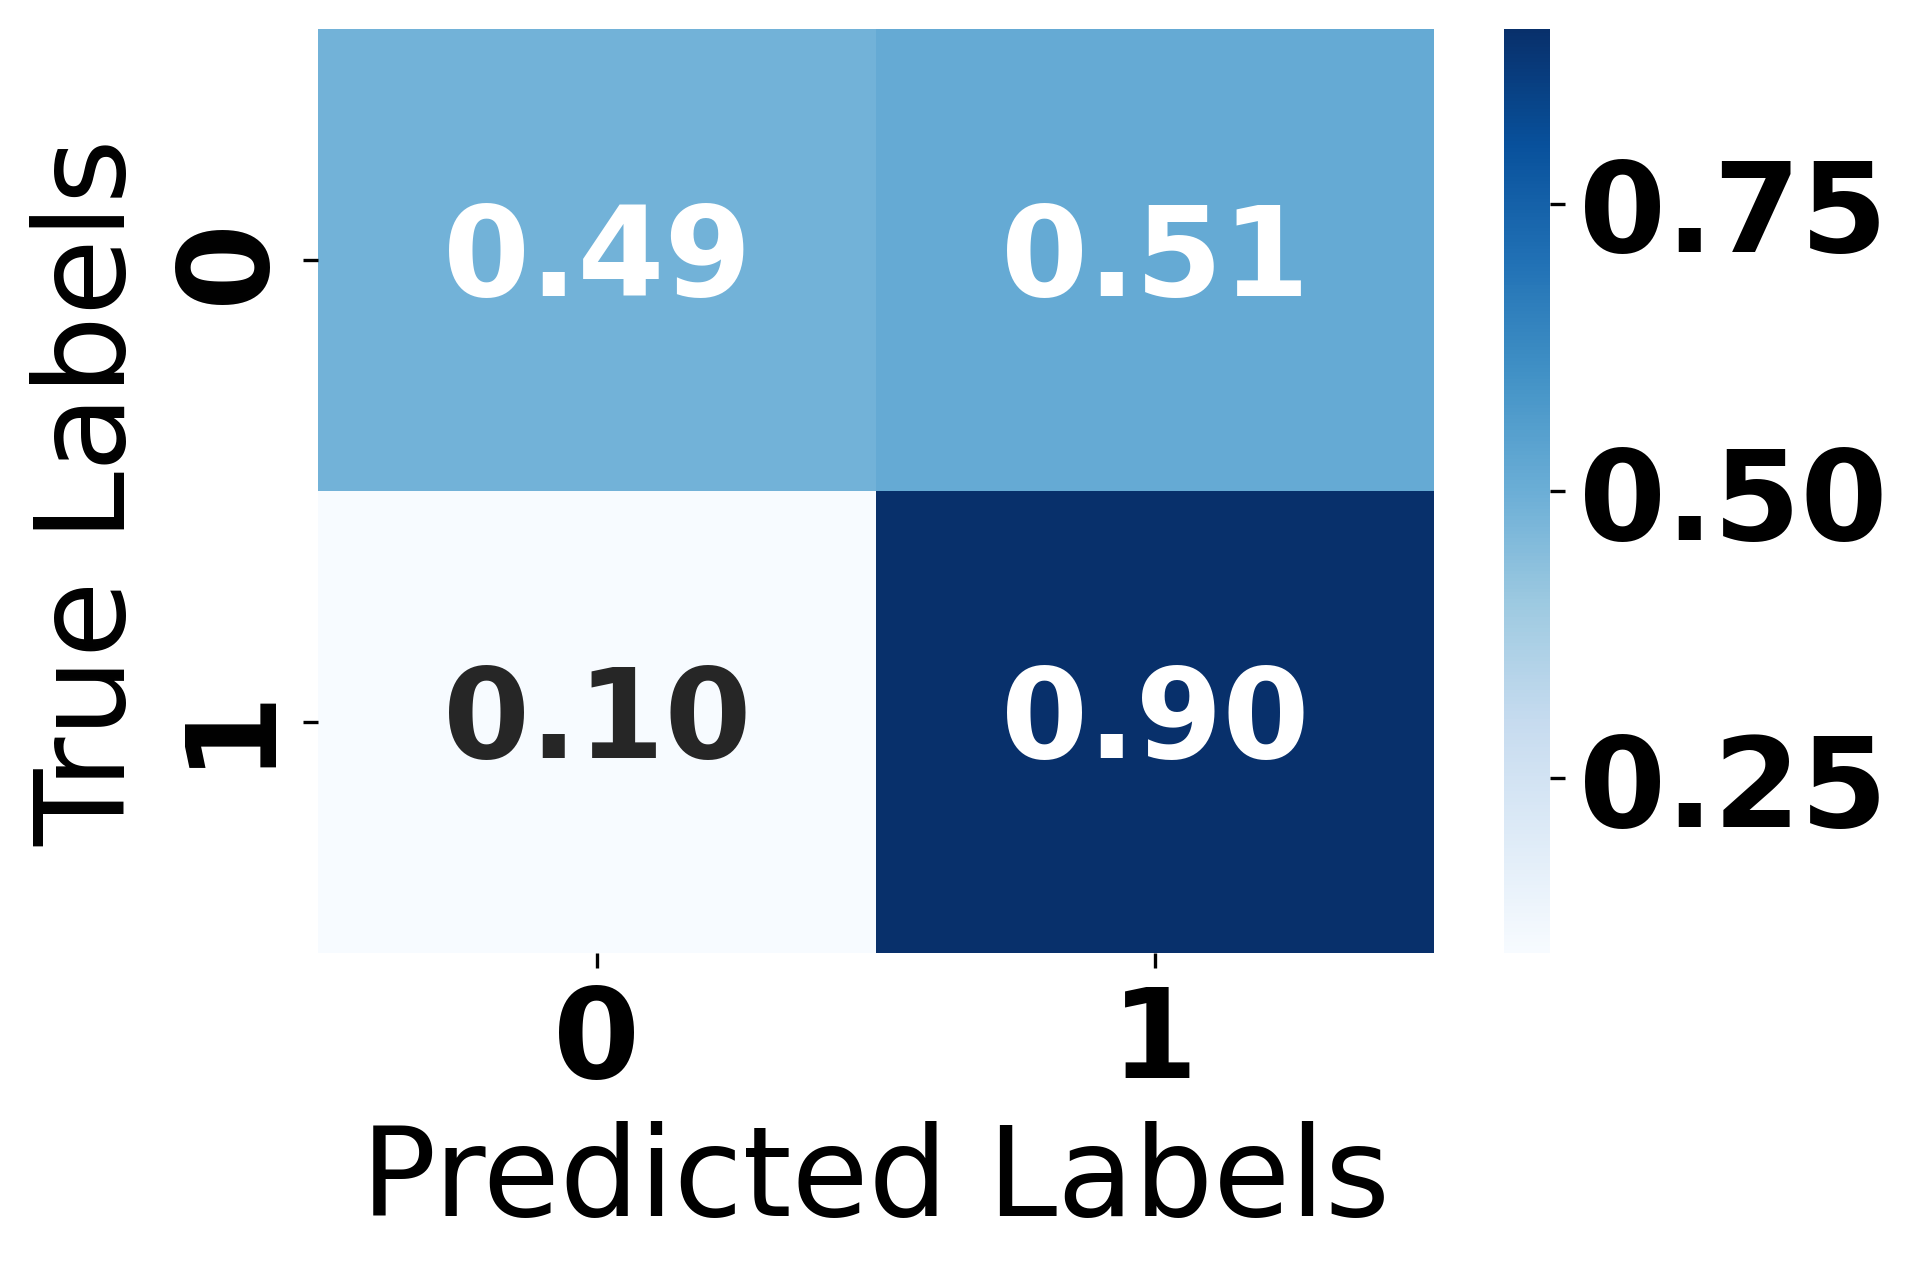

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
243/243 [==============================] - 9s 19ms/step - loss: 0.2657 - accuracy: 0.8993 - val_loss: 1.5045 - val_accuracy: 0.5287
Epoch 2/10
243/243 [==============================] - 3s 13ms/step - loss: 0.1978 - accuracy: 0.9279 - val_loss: 1.7551 - val_accuracy: 0.4969
Epoch 3/10
243/243 [==============================] - 3s 13ms/step - loss: 0.1886 - accuracy: 0.9312 - val_loss: 1.7011 - val_accuracy: 0.5112
Epoch 4/10
243/243 [==============================] - 4s 16ms/step - loss: 0.1810 - accuracy: 0.9340 - val_loss: 1.7813 - val_accuracy: 0.5455
Epoch 5/10
243/243 [==============================] - 4s 19ms/step - loss: 0.1798 - accuracy: 0.9339 - val_loss: 1.9577 - val_accuracy: 0.4670
Epoch 6/10
243/243 [==============================] - 3s 13ms/step - loss: 0.1751 - accuracy: 0.9366 - val_loss: 1.7853 - val_accuracy: 0.5071
Epoch 7/10
243/243 [==============================] - 3s 13ms/step - loss: 0.1742 - accuracy: 0.9359 - val_loss: 1.8903 - val_accuracy: 0.5031

3646/3646 [==============================] - 8s 2ms/step
Normalized Confusion Matrix:
[[0.45631562 0.54368438]
 [0.08449647 0.91550353]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.46      0.62    110005
     Class 1       0.09      0.92      0.17      6663

    accuracy                           0.48    116668
   macro avg       0.54      0.69      0.40    116668
weighted avg       0.94      0.48      0.60    116668



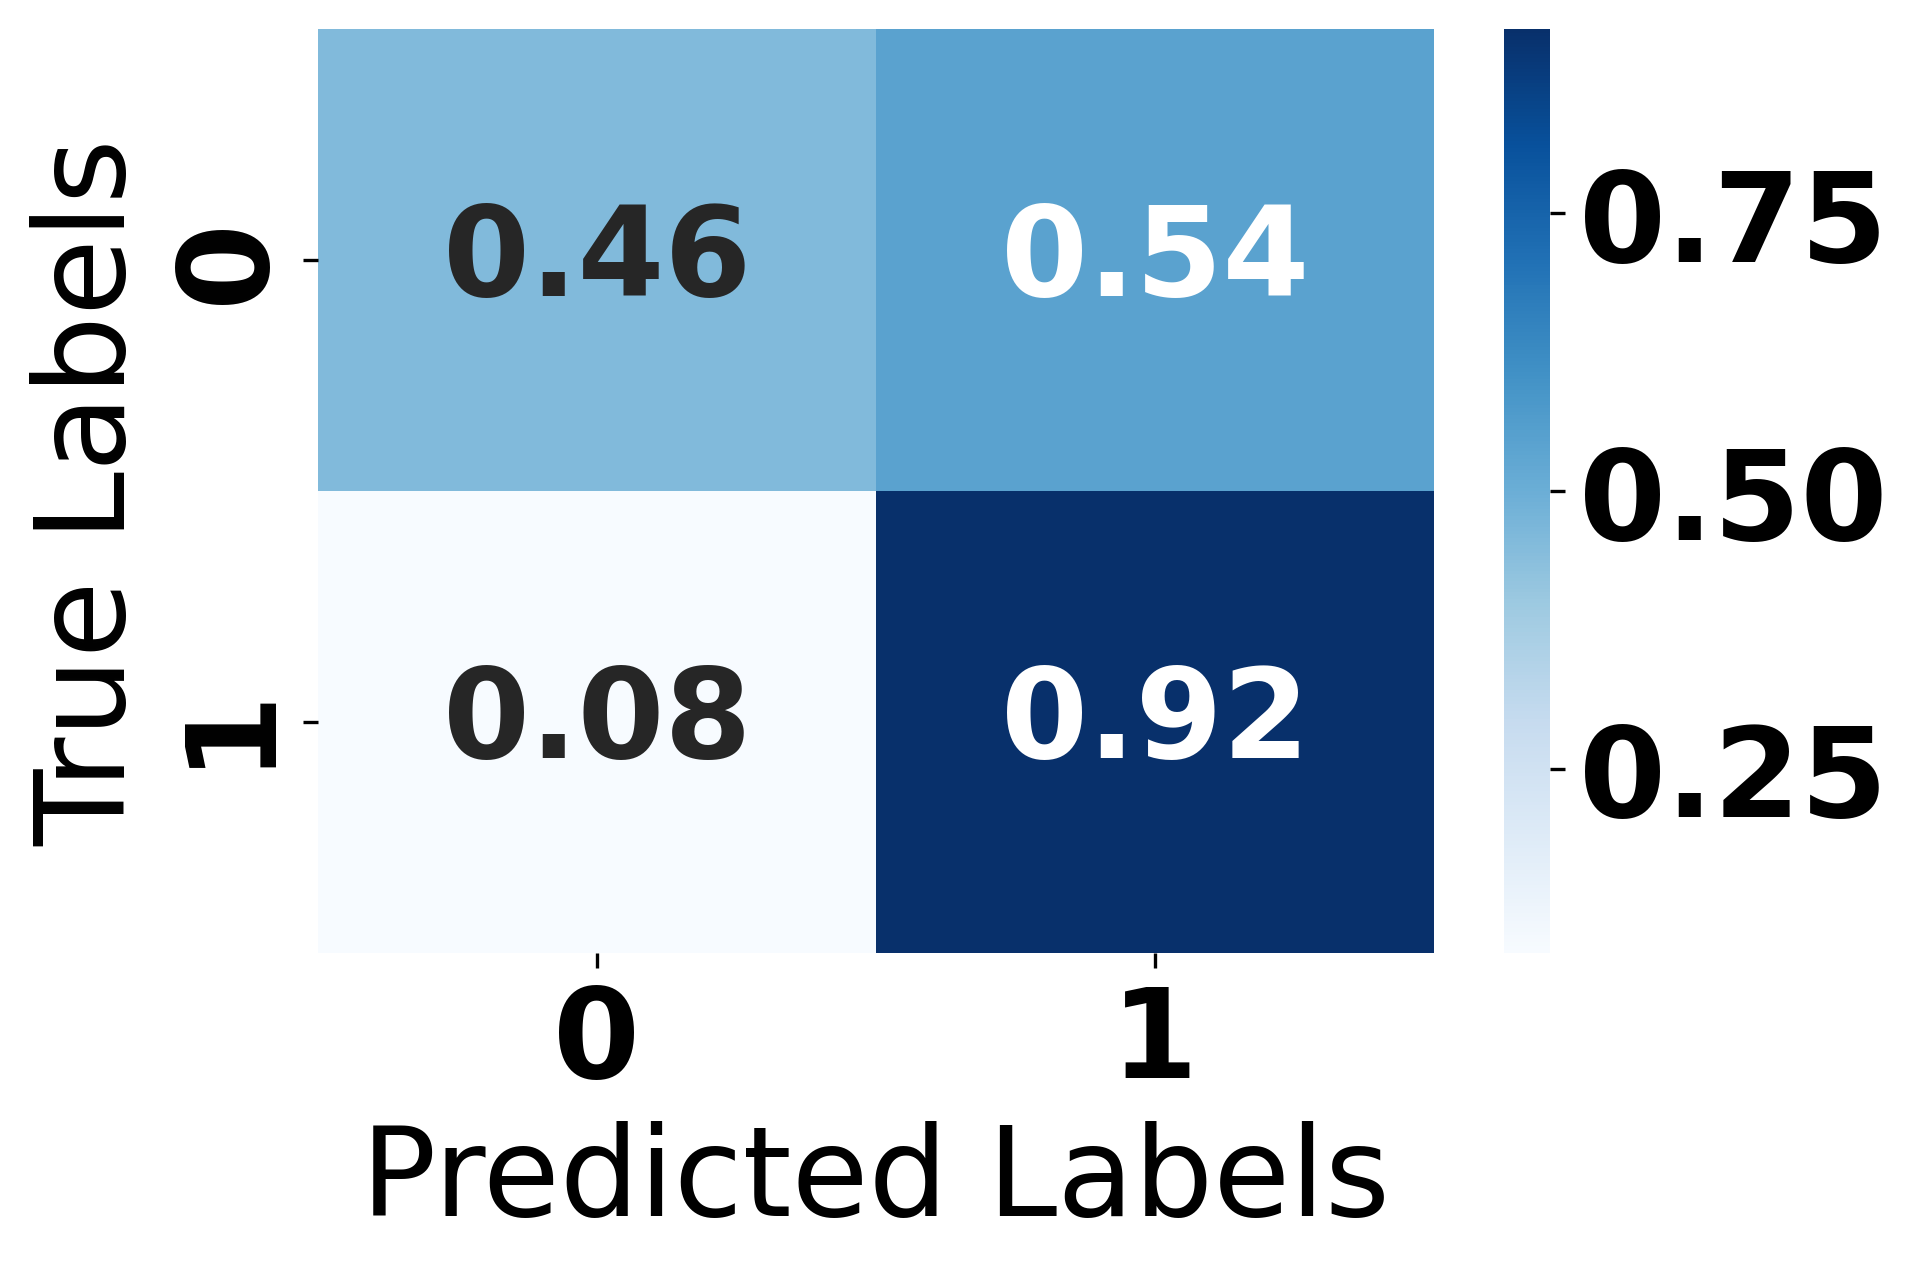

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()